# Code First, Math Later
## Learning Neural Nets Through Implementation and Examples
### Kyle Shaffer

# Talk Overview
* Overview of Deep Learning and Applications
* Introduction to Keras API
* Implementing Neural Networks
* Beyond the Black Box: Investigating Feature Extraction Layers
* Conclusion

# Overall Approach
* Many people start with textbooks and lessons to learn theory and fundamentals before moving on to application
* Mathematics and formal notation can be abstract and difficult to understand
* We can instead combine fundamentals with examples
* Recent deep learning libraries have made prototyping much easier, but these tools can also be used to learn about neural networks prior to application
* We can learn about DL techniques through "picking apart" existing software

## We'd like to go from this....
$$i = \sigma(x_{t}U^i + s_{t-1}W^i)$$
$$f = \sigma(x_{t}U^f + s_{t-1}W^f)$$
$$o = \sigma(x_{t}U^o + s_{t-1}W^o)$$
$$g = \tanh(x_{t}U^g + s_{t-1}W^g)$$
$$c_{t} = c_{t-1} \cdot f + g \cdot i$$
$$s_{t} = \tanh(c_{t}) \cdot o$$

## To this!

In [ ]:
model = Sequential()
model.add(LSTM(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Quick Intro to Deep Learning

# Feedforward Networks

# Feedforward Networks
* __Deep learning__ = models that represent data hierarchically in order to make a prediction
* Deeper layers in this hierarchy automatically identify more general / abstract features
* Traditional ML feature engineering vs. DL architecture engineering
* __Feedforward nets__ = prototypical example of deep networks

<p align="center">
<img src="figs/neural-network.png"/>
</p>

# Feedforward Networks
## Some vocab...
* **_layers_**: arrangements of neurons/cells with no lateral connections
* **_activation function_**: non-linear function that modifies values of a vector and passes these values to a subsequent layer
* **_"deep" network_**: neural network with several layers stacked on top of one another
* **_hidden layer_**: layer in a neural network that is neither the input or output layer (in the middle)

# Feedforward Networks
## Some vocab...
* **_multilayer perceptron_**: another term for feedforward networks

# Feedforward Networks
* Often think of hidden layers as "feature extractors" or "data transformers"
* These layers have their weights adjusted through the training process, and they "learn" representations that are good for a predictive task
* Different way of thinking from traditional process of manually engineering features before feeding to model
* Deeper networks can represent more abstract aspects of data by combining simpler features from previous layers

# Feedforward Networks

<tr>
    <td> <img src="figs/neural-network.png" alt="" style="width: 700px;"/> </td>
    <td> <img src="figs/mlp_code.png" alt="" style="width: 700px;"/> </td>
</tr>

In [4]:
# Build a simple MLP NN
mlp = Sequential()
mlp.add(Dense(input_dim=4, units=5)) # Input (4) and hidden layers (5)
mlp.add(Activation('relu')) # Activation function that links layers
mlp.add(Dense(1)) # Final output layer
mlp.add(Activation('sigmoid'))
mlp.compile(loss='binary_crossentropy', optimizer='sgd')

# Convolutional Networks

# Convolutional Networks
* Often used in image tasks
* Idea of using a "sliding filter" to aggregate features over an image
* Network passes learned feature representations to following layers
* Each subsequent convolutional layer learns more general / abstract concepts

# Convolutional Networks
![conv-layers](figs/conv_layers.png)

## What's a convolution?

In [4]:
import numpy as np

edge_filter = np.array([
    [1, 0, -1], 
    [0, 0, 0],
    [-1, 0, 1]
])

In [8]:
# Convolution function
# Here, we're detecting edges in an image

def convolve(input_image, kernel):
    padded_image = np.pad(input_image, (1, 1), 'constant')
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    # We'll store the convolved image in this NumPy array
    convolved_image = np.zeros_like(input_image)
    
    for i in xrange(padded_image.shape[0] - kernel_width + 1):
        for j in xrange(padded_image.shape[1] - kernel_height + 1):
            # Extract an image chunk of size kernel_width x kernel_height
            temp_array = padded_image[i: i+kernel_width, j: j+kernel_height]
            conv_val = np.sum(temp_array * kernel)
            # Clip values outside the 0 - 255 range
            if conv_val < 0:
                push_val = 0
            elif conv_val > 255:
                push_val = 255
            else:
                push_val = conv_val
            convolved_image[i, j] = push_val
    return convolved_image

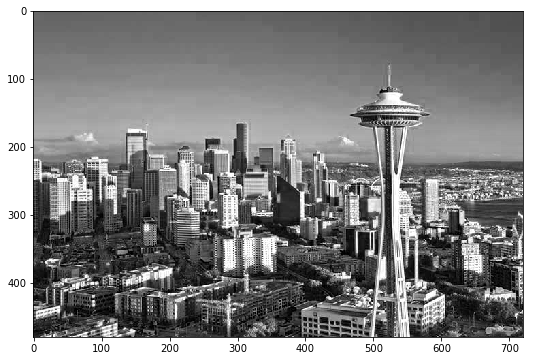

In [21]:
# Let's read in an image and view it
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline

img = np.array(Image.open("figs/space_needle2.png"))
single_channel_img = img[:, :, 0]
plt.figure(figsize=(10, 6))
plt.imshow(single_channel_img, plt.get_cmap('gray'))

In [22]:
img_edges = convolve(single_channel_img, edge_filter)
plt.figure(figsize=(img_height, img_width))
plt.imshow(img_edges, plt.get_cmap('gray'))

NameError: name 'convolve' is not defined

## What's a convolution?
![conv-img](figs/convolution.gif)
Source: Source: http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution

# Convolutional Networks
* Models that use convolutions as a way to construct summaries of local patches of images
* Learn to represent hierarchies of image features that are good for prediction
* Popular in computer vision, also applicable in NLP

# Recurrent Networks

# Recurrent Networks
* Capture sequential dependencies in data
* Often used for language / text data or time series
* Learn a "cell state" that represents relationships between items in input sequence
* These come in several flavors (GRU, LSTM, Bidirectional RNN)
* Caveats: can take very long time to train, optimization can be tricky

![lstm-unrolled](figs/lstm_unrolled.png)
Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

![inside-lstm](figs/inside_lstm.png)
Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

![lstm-anim](figs/lstm_animation.gif)

# Introduction to Keras

## Keras Homepage
https://keras.io/
![keras-homepage](figs/keras_homepage.png)

# Introduction to Keras
* Abstracts implementation details
* Allows for quick prototyping
* Think in terms of "stacking layers"

In [ ]:
# General pattern of writing Keras models

# (1) Start a "container" of model layers
# (2) Add initial input and feature extraction layers
# (3) Finally add output layer for final predictions

In [ ]:
# (1) Start a "container" of model layers
model = Sequential()

# (2) Add initial input and feature extraction layers
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))

# (3) Finally add output layer for final predictions
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Overview of Keras
* Allows us to prototype and construct architectures quickly
* Nice data preprocessing tools and pre-loaded datasets
* Can be easy to treat networks as "black boxes"

# Implementing Neural Nets: Examples

# CNN for Object Recognition

## Keras Datasets
https://keras.io/datasets/
![Datsets](figs/keras_datasets.png)

In [39]:
# Let's load the data we'll use
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print "Training data:", X_train.shape
print "Training labels:", y_train.shape

Training data: (50000, 32, 32, 3)
Training labels: (50000, 10)


(32, 32, 3)


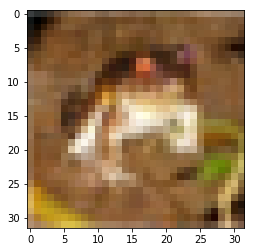

In [46]:
# Input tensor is just a collection of 3D tensors
# Each is an image with 3 color channels
X_train = np.array([img / 255. for img in X_train])
first_img = X_train[0, :, :, :]
print first_img.shape
# A frog I think?
plt.imshow(first_img)

In [26]:
# Imports for the model
from keras.layers import Activation, Dropout, Flatten
from keras.layers import Conv2D, Dense, MaxPooling2D

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=5, batch_size=64)
model.save('scratch_cnn.h5')

Epoch 1/5
25000/25000 [==============================] - 206s - loss: 1.7302     

In [69]:
def visualize_predictions(model, img):
    prediction_img = np.expand_dims(img, axis=0)
    classes = range(10)
    probabilities = model.predict(prediction_img)[0]
    prediction_dict = dict(zip(classes, probabilities))
    plt.figure()
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.bar(classes, probabilities, align="center")
    plt.show()

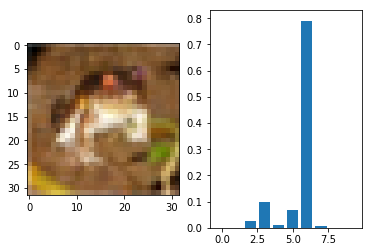

In [70]:
visualize_predictions(model=model, img=first_img)

# LSTM for Document Classification

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(100))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

$$\sigma = sigmoid$$
$$LSTM = \tanh(C_{t-1})$$

$$model = \sigma(LSTM(Embedding(words))$$

# LSTM for Document Classification
* For text, often most time needs to be spent in data munging and formatting
* We can't feed raw text to a model, so we need to transform the text into a numerical format the model can ingest
* Typical transformation pipeline:
    * Tokenize our text
    * Convert words to vocabulary ID's
    * Each document is now a sequence of integers (ID's)
    * Our training set is then a matrix with rows as documents, and columns as word ID's

In [ ]:
# Preprocessing steps to feed text to neural network
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Beyond the Black Box: Investigating Feature Extraction Layers

## Architecture Debugging

In [2]:
# Building our model architecture...
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM

def build_lstm_model():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    # Recurrent layers
    model.add(LSTM(64))
    model.add(LSTM(64)) # Let's make a deeper LSTM!
    # Additional fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Layer that actually does the classification
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

Using TensorFlow backend.


In [22]:
# Cool, let's build our model so we can use it - oh wait...
lstm_model = build_lstm_model()

ValueError: Input 0 is incompatible with layer lstm_8: expected ndim=3, found ndim=2

In [3]:
def build_lstm_feature_extractor():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    model.add(LSTM(64))
    # In principle, this last step doesn't make much sense
    # But, we need to compile a model in order to play with it
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

In [4]:
import numpy as np

partial_model = build_lstm_feature_extractor()
# Let's make some fake data
X_fake = np.array([np.random.randint(low=0, high=1, size=100) 
                   for _ in xrange(100)])
print "Shape of our fake data:", X_fake.shape

lstm_features = partial_model.predict(X_fake)
print "Shape of feature data from first LSTM layer:", lstm_features.shape

Shape of our fake data: (100, 100)
Shape of feature data from first LSTM layer: (100, 64)


In [6]:
# Easy fix - `return_sequences` parameter in first LSTM layer
def build_lstm_feature_extractor():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    model.add(LSTM(64, return_sequences=True)) # <- Now we're returning a sequence of vectors
    # In principle, this last step doesn't make much sense
    # But, we need to compile a model in order to play with it
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

lstm_model = build_lstm_feature_extractor()
lstm_features = lstm_model.predict(X_fake)
print "New shape of data:", lstm_features.shape

New shape of data: (100, 100, 64)


In [8]:
def build_fixed_lstm():
    model = Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    # Recurrent layers
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64)) # Let's make a deeper LSTM!
    # Additional fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Layer that actually does the classification
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

fixed_lstm = build_fixed_lstm()

## Understanding Data Flow Through the Network

In [12]:
def show_data_flow(input_data):
    model = Sequential()
    layer_list = [Embedding(input_dim=2000, output_dim=200, input_length=100),
                 LSTM(64),
                 Dense(128, activation='relu'),
                 Dense(4, activation='softmax')]
    for layer in layer_list:
        model.add(layer)
        model.compile(loss='categorical_crossentropy', optimizer='sgd')
        y_hat = model.predict(input_data)
        print "Data shape at {} layer:".format(layer.name), y_hat.shape
        
show_data_flow(X_fake)

Data shape at embedding_9 layer: (100, 100, 200)
Data shape at lstm_11 layer: (100, 64)
Data shape at dense_9 layer: (100, 128)
Data shape at dense_10 layer: (100, 4)


## Retrieving Layer Weights

In [ ]:
# Keras models have a `layers` attribute that is simply
# a list containing the (wait for it) layers of your model
partial_model.layers

In [40]:
# We can also return the actual weights from these layers
lstm_weights = partial_model.layers[1].get_weights()
print type(lstm_weights)
print len(lstm_weights)

for weight_matrix in lstm_weights:
    print weight_matrix.shape

<type 'list'>
3
(200, 256)
(64, 256)
(256,)


In [41]:
# Still just NumPy arrays!
lstm_weights[0]

array([[-0.00139691,  0.06412541, -0.00728998, ...,  0.07583428,
         0.02882855,  0.0599801 ],
       [ 0.08534846,  0.0171094 , -0.07984166, ...,  0.07028192,
         0.04327398, -0.07120567],
       [-0.00677217, -0.03426547,  0.04307427, ...,  0.10646328,
         0.07360189, -0.09827101],
       ..., 
       [-0.09700623, -0.05641634, -0.00955244, ...,  0.00885451,
        -0.08707197, -0.00761497],
       [-0.066992  ,  0.06831715, -0.09680328, ..., -0.02698374,
         0.08718883,  0.02109569],
       [ 0.04942372, -0.023612  , -0.09787799, ..., -0.05172569,
         0.01122611,  0.08796722]], dtype=float32)

In [17]:
# Another function to build simple LSTM
def build_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=2000, output_dim=200, input_length=100))
    model.add(LSTM(units=64))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [26]:
# Let's build our model
lstm_model = build_lstm()

# Look at output of each layer in network
# in order to better understand data transforms
for layer in lstm_model.layers:
    print layer.name, ":", [l.shape for l in layer.get_weights()]

embedding_10 : [(2000, 200)]
lstm_11 : [(200, 256), (64, 256), (256,)]
dense_8 : [(64, 1), (1,)]
activation_7 : []


In [47]:
X_fake = np.random.normal(size=(1000, 200))

model = Sequential()
model.add(Dense(100, input_dim=200))
model.add(Dense(100))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')

for layer in model.layers:
    temp_model = model.

 dense_16 [(200, 100), (100,)]
dense_17 [(100, 100), (100,)]
dense_18 [(100, 1), (1,)]
activation_10 []


# Retrieving Layer Weights
* Help conceptualize what's happening "under the hood" in our network
* May help us understand computation time at a high level
* Other applications: transfering weights from one network to another

# Recap
* We've gone over popular architectures and some fundamentals in deep learning
* Learned about Keras as a tool to implement and experiment with these architectures
* Looked at ways to "peer into" network architectures to better understand data transformations as they happen in the network

# Recap
* Taken some of the "mystery" out of neural networks
* Nothing magic - vectors, matrices, functions which can be implemented in familiar tools (NumPy)
* Iterative approach to learning about neural networks - fundamentals/theory -> practice -> repeat!

# Thanks! Questions?